# Changing Phase of Images
**Ricardo Antonio Gutiérrez Esparza \
Juan Marquina Cancino**

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [20]:
def dft_image(path):
    '''Returns the shifted fourier transform, as well as 
       its magnitude and phase.
    '''
    img = cv2.imread(path,0)

    img_float32 = np.float32(img)

    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)


    mag, ang = cv2.cartToPolar(dft_shift[:,:,0], dft_shift[:,:,1])

    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

    plt.subplot(221),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'hot')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.subplot(223),plt.imshow(20*np.log(mag),cmap='hot')
    plt.title('Magnitude Spectrum 2'), plt.xticks([]), plt.yticks([])
    plt.subplot(224),plt.imshow(ang,cmap='hot')
    plt.title('Angle Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
    return dft_shift, mag, ang

In [31]:
def idft_image(dft_shift, mag, ang):
    '''Applies the inverse fourier transform for the given
       magnitude and phase.
    '''
    dft_shift1, dft_shift2 = cv2.polarToCart(mag,ang)
    new_dft_shift = np.zeros(dft_shift.shape)
    new_dft_shift[:,:,0] = dft_shift1
    new_dft_shift[:,:,1] = dft_shift2
    f_ishift = np.fft.ifftshift(new_dft_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    plt.figure()
    plt.imshow(img_back, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

## Plotting magnitude and phase of two grayscales images

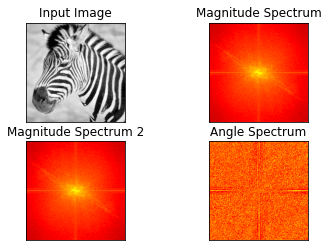

In [21]:
z_dft_shift, z_mag, z_ang = dft_image('zebra.png')

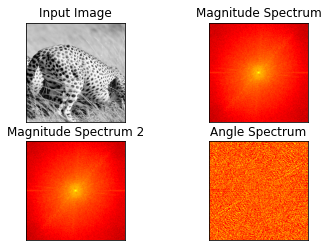

In [22]:
c_dft_shift, c_mag, c_ang = graficas('cheetah.png')

At first sight, the angle (or phase) spectrum might seem like noise. While it does not reveal as much information as the magnitude spectrum, it is in fact important, as we will see next.

## Switching phases and reconstructing

#### Cheetah image with the zebra phase

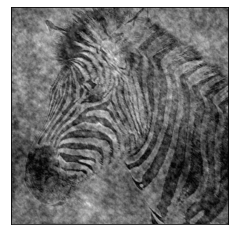

In [35]:
idft_image(c_dft_shift, c_mag, z_ang)

#### Zebra image with the cheetah phase

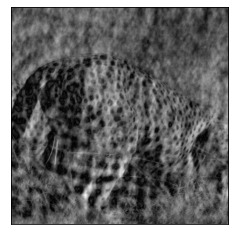

In [36]:
idft_image(z_dft_shift, z_mag, c_ang)

Using the phase of an image with the magnitude of another creates a noisy version of the image that we took the phase from. This reveals that the phase contains structural information about the image: how the frequencies conform the image, whereas the magnitude tells us how much each frequency contributes. Both are important because they tell a different aspect of the image. 